In [1]:
%matplotlib widget

isdark = False

from rayoptics.environment import *

In [164]:
opm = OpticalModel()
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']

osp['pupil'] = PupilSpec(osp, key=['object', 'pupil'], value=16)
osp['fov'] = FieldSpec(osp, key=['object', 'angle'], value=0.5, flds=[0., 0.707, 1.], is_relative=True)
osp['wvls'] = WvlSpec([('F', 0.5), (587.5618, 1.0), ('C', 0.5)], ref_wl=1)

opm.radius_mode = True

sm.gaps[0].thi=1e10

def calc_curvature(n, fl):
    return (n-1)*fl

n_bk7 = 1.5168
n_lasf9 = 1.85025
n_f2 =  1.62005

v_bk7 = 64.17
v_lasf9 = 32.16
v_f2 = 36.43
# try for chaining a 3x telescope setup with a second 3x telescope setup
f0 = 150
f0_0 = (v_bk7-v_f2)*f0/v_bk7
f0_1 = -f0_0*v_bk7/v_f2/1.2
f0_actual = 1/(1/f0_0+1/f0_1)
f1 = 40
# 1/f = 1/f0 + 1/f1 = 1/f0 - v2/(f0*v1) = (v1-v2)/(v1*f0)
# f0 = (v1-v2)*f/v1
f1_0 = (v_bk7-v_f2)*f1/v_bk7
f1_1 = -f1_0*v_bk7/v_f2
print(f0_actual, f1_0, f1_1)
f2 = 150
f3 = 50

f1_stacked = 2*f1

r0 = calc_curvature(n_lasf9, f0)
r0_0 = calc_curvature(n_bk7, f0_0)
r0_1 = calc_curvature(n_f2, f0_1)
r1 = calc_curvature(n_lasf9, f1)
r1_0 = calc_curvature(n_bk7, f1_0)
r1_1 = calc_curvature(n_f2, f1_1)
r2 = calc_curvature(n_lasf9, f2)
r3 = calc_curvature(n_lasf9, f3)

sm.add_surface([r0_0, 2, 'N-BK7', 'Schott', 42/2])
sm.add_surface([1e9, 2, 'N-F2', 'Schott', 42/2])
#sm.add_surface([-r0_1, 180+2*f1])
sm.add_surface([-r0_1, 180+2*36.])

#sm.add_surface([r1_0, 6, 'N-BK7', 'Schott', 16])
#sm.add_surface([1e9, 2, 'N-F2', 'Schott', 16])
#sm.add_surface([-r1_1, 30])
sm.add_surface([1e9, 2, 'N-LASF9', 'Schott', 16])
sm.add_surface([-r1, f2+f3])

#sm.add_surface([r2, 2, 'N-LASF9', 'Schott', 16])
#sm.add_surface([1e9, f2+f3])
#sm.add_surface([1e9, 2, 'N-LASF9', 'Schott', 16])
#sm.add_surface([-r3, f3])


203.43209152244057 17.29156926912888 -30.45841339555312


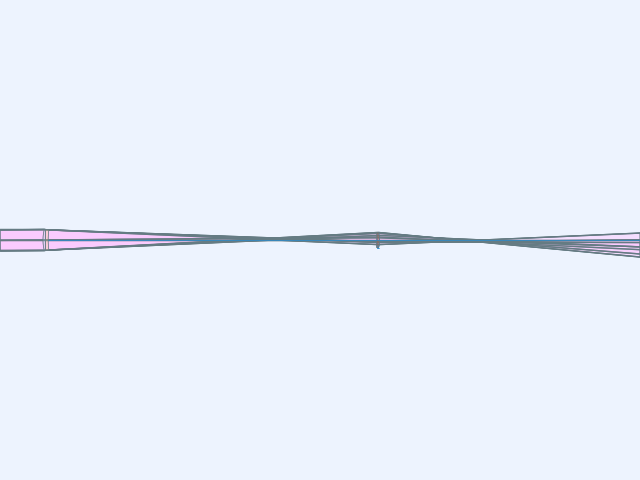

In [165]:
opm.update_model()

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

In [166]:
pm.first_order_data()

efl              -228.7
ffl               -1265
pp1               -1494
bfl               88.74
ppk              -317.4
f/#              -14.29
m             2.287e-08
red           4.373e+07
obj_dist          1e+10
obj_ang             0.5
enp_dist             -0
enp_radius            8
na obj            8e-10
n obj                 1
img_dist          88.74
img_ht           -1.995
exp_dist         -63.84
exp_radius        1.446
na img          0.03497
n img                 1
optical invariant      0.06981


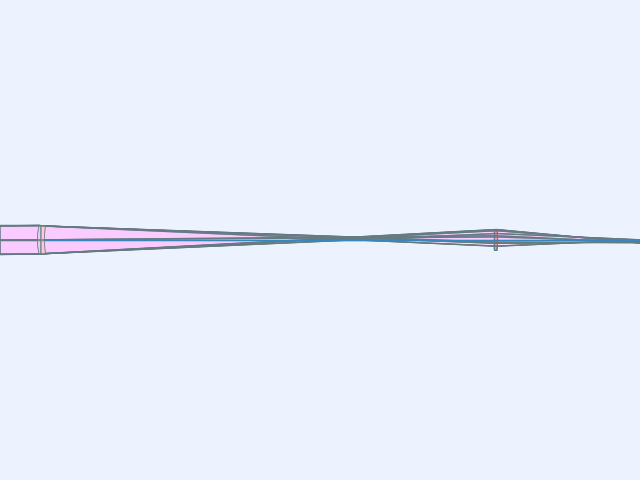

In [173]:
# add a focusing mirror
#sm.add_surface([100, 2, 1.85, 16])
#sm.add_surface([1e9, 36])

opm.update_model()

opm.seq_model.gaps[-1].thi = opm.optical_spec.parax_data.fod.bfl - 9
opm.update_model()

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

79.74261314593804

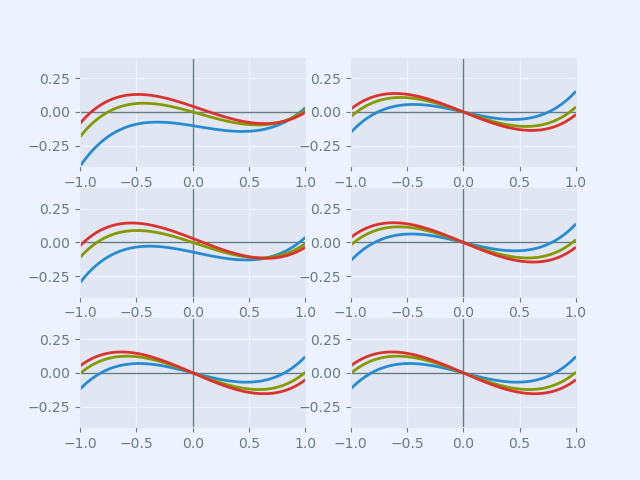

In [174]:
#opm.seq_model.gaps[-1].thi -= 0.1
opm.update_model()
#spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
#                      user_scale_value=0.1, is_dark=isdark).plot()
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.All_Same).plot()
opm.seq_model.gaps[-1].thi

79.74261314593804

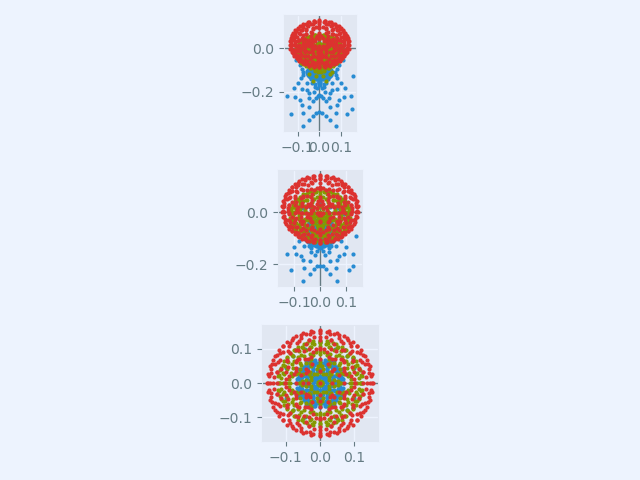

In [175]:
#opm.seq_model.gaps[-1].thi -= 0.1
opm.update_model()
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, is_dark=isdark).plot()

opm.seq_model.gaps[-1].thi

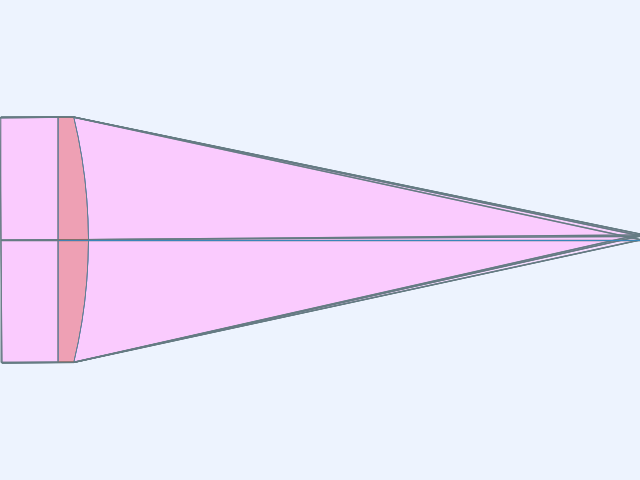

In [163]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()